# Machine Learning Final Project
Group Member: Yutai Li, Gabriel Nicholson

## PCA for shift detection

In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
from scipy.io.arff import loadarff 
from sklearn.decomposition import PCA
import scipy

### Dataset

Source: https://www.openml.org/search?type=data&sort=runs&id=151&status=active
    
Electricity is a widely used dataset described by M. Harries and analyzed by J. Gama. This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends).

#### Features:
**Date**: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1

**Day**: day of the week (1-7)

**Period**: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1

**NSWprice**: New South Wales electricity price, normalized between 0 and 1

**NSWdemand**: New South Wales electricity demand, normalized between 0 and 1

**VICprice**: Victoria electricity price, normalized between 0 and 1

**VICdemand**: Victoria electricity demand, normalized between 0 and 1

**transfer**: scheduled electricity transfer between both states, normalized between 0 and 1

#### Target Variable:

**class**:  the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours

In [2]:
raw_data = loadarff('electricity-normalized.arff')
df = pd.DataFrame(raw_data[0])
df['target'] = np.where(df['class'] == b'UP', 1, 0)
df = pd.get_dummies(df.drop(columns='class'))

In [3]:
df[10000:20000]

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target,day_b'1',day_b'2',day_b'3',day_b'4',day_b'5',day_b'6',day_b'7'
10000,0.030707,0.340426,0.089828,0.298572,0.003467,0.422915,0.414912,1,0,0,0,0,0,0,1
10001,0.030707,0.361702,0.089828,0.319101,0.003467,0.422915,0.414912,1,0,0,0,0,0,0,1
10002,0.030707,0.382979,0.089828,0.322672,0.003467,0.422915,0.414912,1,0,0,0,0,0,0,1
10003,0.030707,0.404255,0.083794,0.320589,0.003467,0.422915,0.414912,1,0,0,0,0,0,0,1
10004,0.030707,0.425532,0.089828,0.310176,0.003467,0.422915,0.414912,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.447724,0.574468,0.047796,0.623475,0.003851,0.646815,0.256140,0,0,0,0,0,1,0,0
19996,0.447724,0.595745,0.042152,0.601755,0.003297,0.638011,0.247368,0,0,0,0,0,1,0,0
19997,0.447724,0.617021,0.043233,0.605623,0.003008,0.617038,0.277193,0,0,0,0,0,1,0,0
19998,0.447724,0.638298,0.042272,0.608747,0.002933,0.592698,0.353070,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   period     45312 non-null  float64
 2   nswprice   45312 non-null  float64
 3   nswdemand  45312 non-null  float64
 4   vicprice   45312 non-null  float64
 5   vicdemand  45312 non-null  float64
 6   transfer   45312 non-null  float64
 7   target     45312 non-null  int64  
 8   day_b'1'   45312 non-null  uint8  
 9   day_b'2'   45312 non-null  uint8  
 10  day_b'3'   45312 non-null  uint8  
 11  day_b'4'   45312 non-null  uint8  
 12  day_b'5'   45312 non-null  uint8  
 13  day_b'6'   45312 non-null  uint8  
 14  day_b'7'   45312 non-null  uint8  
dtypes: float64(7), int64(1), uint8(7)
memory usage: 3.1 MB


In [5]:
first = df.query('date < 0.45')
second = df.query('date > 0.98')
v1 = np.sqrt(np.sum((scipy.linalg.svdvals(first) - scipy.linalg.svdvals(second))**2))
U, S, VT = la.svd(first)
U_s, S_s, VT_s = la.svd(second)
print(v1)

first = df.query('date < 0.45')
second = df.query('date > 0.90')
v2 = np.sqrt(np.sum((scipy.linalg.svdvals(first) - scipy.linalg.svdvals(second))**2))
print(v2)

first = df.query('date < 0.60')
second = df.query('date > 0.60 and date < 0.90')
U, S, VT = la.svd(first)
U_s, S_s, VT_s = la.svd(second)
v3 = np.sqrt(np.sum((scipy.linalg.svdvals(first) - scipy.linalg.svdvals(second))**2))
print(v3)

first = df.query('date < 0.45')
second = df.query('date > 0.90')

190.37229263333415
97.65797924750093
77.6550972906761


In [6]:
np.round(VT[0], 2)

array([-0.24, -0.46, -0.05, -0.37, -0.  , -0.35, -0.38, -0.46, -0.12,
       -0.12, -0.12, -0.12, -0.12, -0.12, -0.11])

In [7]:
np.round(VT_s[0], 2)

array([-0.59, -0.36, -0.04, -0.32, -0.  , -0.31, -0.4 , -0.33, -0.09,
       -0.09, -0.1 , -0.1 , -0.1 , -0.1 , -0.1 ])

In [8]:
print(np.dot(VT_s[0], VT[0]))
print(np.dot(VT_s[1], VT[1]))
print(np.dot(VT_s[2], VT[2]))
print(np.dot(VT_s[3], VT[3]))

0.9196151271197985
-0.9242744111026364
0.8326324200875465
0.014504586130428229


In [9]:
print(np.dot(VT_s[0], VT[0]))
print(np.dot(VT_s[1], VT[1]))
print(np.dot(VT_s[2], VT[2]))
print(np.dot(VT_s[3], VT[3]))

0.9196151271197985
-0.9242744111026364
0.8326324200875465
0.014504586130428229


In [10]:
X = first.drop(columns=['target', 'date'])
y = first['target']
weights = la.inv(X.T @ X) @ X.T @ y

In [11]:
test_X = second.drop(columns=['target', 'date'])
test_y = second['target']

In [12]:
weights.index = X.columns

In [13]:
corr_compare = pd.DataFrame({'first':first.corr().round(2)['target'], 'second':second.corr().round(2)['target']})
corr_compare

,first,second
date,0.01,-0.05
period,0.17,0.11
nswprice,0.58,0.54
nswdemand,0.34,0.41
vicprice,0.21,0.15
vicdemand,0.15,0.38
transfer,-0.09,-0.17
target,1.00,1.00
day_b'1',0.07,0.01
day_b'2',-0.01,0.14


In [14]:
weights.loc['vicdemand'] *= 1.23
# weights.loc["day_b'2'"] *= 1.23
pred_y = test_X.values @ weights

In [15]:
print(f"train error: {np.mean(np.where(X.values @ weights < 0.5, 0, 1) == y)}")
print(f"test error: {np.mean(np.where(pred_y < 0.5, 0, 1) == test_y)}")

train error: 0.8180423594615994
test error: 0.8333333333333334


### Using resampling approaches at the data drift point 

1. The case where we are doing the data analysis in real time. Retrain the model with more weight on the most recent data?
2. The case where we have SOME of the test values but not all of them. Once again we can train on these with higher weights on these samples. 
3. Use the PCA and K-Means approach?


**How does Sklearn implement their sample weighting?**

- I think one approach is to make a new loss function where it is disjoint? 
- Another approach for this project is making probabilities more uncertain for drifted data and comparing the log-loss of this function compared to the regular one. The theory predicts that higher uncertainity should lead to a better loss. 

### Applying PCA

In [16]:
pca_99 = PCA(.999)

In [17]:
before = df.query('date <= 0.8')
after = df.query('date > 0.8')
X_before = before.drop(columns=['target', 'date'])
y_before = before['target']

In [18]:
X_after = after.drop(columns=['target', 'date'])
y_after = after['target']

In [19]:
X_after.shape

(16272, 13)

In [20]:
X_before.shape

(29040, 13)

In [21]:
components = pca_99.fit_transform(X_before)
componentsDf = pd.DataFrame(data = components)
componentsDf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.215637,-0.112728,0.843011,-0.175446,-0.198261,0.000120,0.497076,0.137403,0.021949,-0.035649,-0.009262
1,-0.213058,-0.112749,0.842914,-0.174970,-0.198776,0.000115,0.483539,0.114010,0.006473,-0.027446,-0.012641
2,-0.209559,-0.112775,0.842779,-0.174378,-0.199465,0.000116,0.471557,0.086779,-0.012509,-0.017687,-0.011237
3,-0.199392,-0.112843,0.842408,-0.172894,-0.201359,0.000112,0.470731,0.030446,-0.053419,0.004178,-0.013452
4,-0.190381,-0.112904,0.842076,-0.171567,-0.203048,0.000111,0.467977,-0.020776,-0.090707,0.023902,-0.013062


In [22]:
components.shape

(29040, 11)

In [23]:
np.dot(components.T, components).shape

(11, 11)

In [24]:
pca_99.singular_values_

array([65.35800436, 64.62223551, 64.62115867, 64.41751411, 64.32711042,
       64.24957089, 52.07666441, 24.69744594, 19.68248427,  9.80618966,
        5.4611653 ])

In [25]:
V = pca_99.components_

Now we have the principal comopnets of `X_before`, then we want to project `X_after` to the principal componets of `X_before` to get a projection matrix of `X_after`

In [26]:
X_projection = X_after@V.T@V
X_projection.shape

(16272, 13)

Then, we want to compare the statistical distribution of each of the features in `X_before` with the one in `X_projection` by using *KL-divergence* to see if the distribution of each feature changes. If the change-score pass a certain threshold, then it is likely that the distribution of the training data is different from that in the test data. 

The definition of *KL-divergence* for continus variable is as follow $$D_{KL}(P \parallel Q) = \int_{-\infty}^{\infty} p(x)\log(\frac{p(x)}{q(x)}) dx\$$

In [27]:
from scipy.stats import norm

In [28]:
X_projection[:][0]

29040   -4.449208e-07
29041    2.127652e-02
29042    4.255247e-02
29043    6.382946e-02
29044    8.510550e-02
             ...     
45307    9.148936e-01
45308    9.361696e-01
45309    9.574466e-01
45310    9.787226e-01
45311    9.999996e-01
Name: 0, Length: 16272, dtype: float64

In [29]:
norm.pdf(X_projection[:][0])/norm.pdf(X_projection[:][1])

array([1.00059464, 1.00032815, 0.99966111, ..., 0.63290425, 0.62077441,
       0.60728361])

In [30]:
from sklearn import preprocessing
normed = preprocessing.normalize(norm.pdf(X_projection[:][4]).reshape(1, -1))
np.sum(normed)

127.25471707766098

In [31]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p.dot(np.log(p / q)), 0))

In [32]:
def get_change_score(f_before, f_after):
#     entropy_train_valid = scipy.special.rel_entr(f_before, f_after)   
#     kl_div_train_valid = np.sum(entropy_train_valid)
#     p = norm.pdf(f_before)
#     q = norm.pdf(f_after)
    change_score = kl_divergence_2(f_before, f_after)
    
    
    return change_score

In [33]:
(norm.pdf(X_projection[:][2])).shape

(16272,)

In [35]:
X_array = X_before.to_numpy()

In [36]:
from scipy.special import rel_entr
sum(rel_entr(X_projection[:][4], X_array[:16272,4]))

inf

In [37]:
norm.pdf(X_array[:][0]).shape

(13,)

In [38]:
X_array[:,0].shape

(29040,)

In [47]:
X_array.shape
X_projection.shape

(16272, 13)

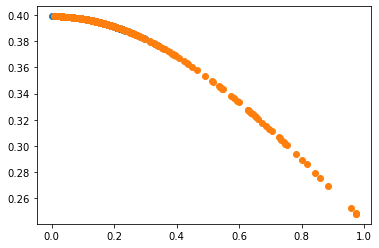

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(X_array[:16272,1], norm.pdf(X_array[:16272,1]))
plt.scatter(X_projection[:][1], norm.pdf(X_projection[:][1]))

In [56]:
norm.pdf(X_projection[:][1])

array([0.39870519, 0.39872115, 0.39871638, ..., 0.39857705, 0.39808093,
       0.39844781])

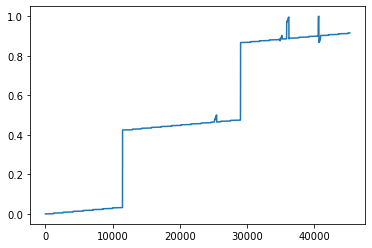

In [57]:
fig, ax = plt.subplots(1, 1)
ax.plot(df['date'].to_numpy())
plt.show()

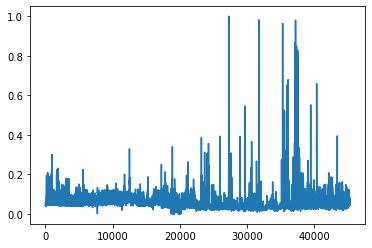

In [58]:
fig, ax = plt.subplots(1, 1)
ax.plot(df['nswprice'].to_numpy())

In [59]:
col_list = df.columns.tolist()
col_list

['date',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer',
 'target',
 "day_b'1'",
 "day_b'2'",
 "day_b'3'",
 "day_b'4'",
 "day_b'5'",
 "day_b'6'",
 "day_b'7'"]

In [60]:
col_list.remove('period')

## Visualization of original data

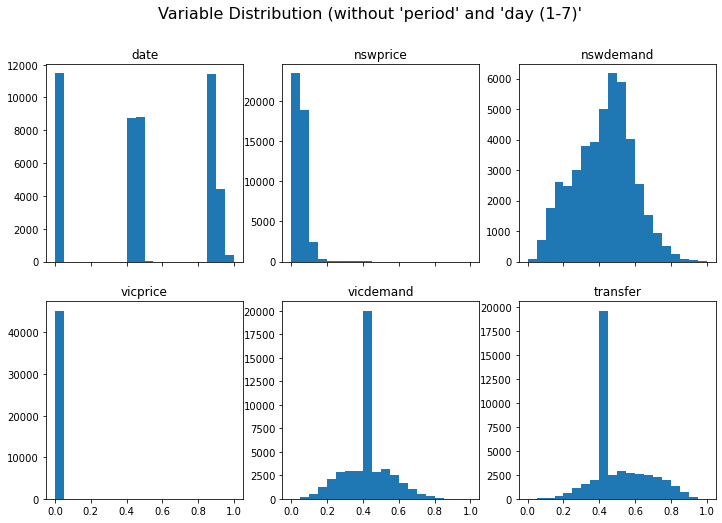

In [61]:
# variable distribution (without 'period' and 'day(1-7)')
fig, axes = plt.subplots(2,3,sharex='all', figsize = (12,8))
for index, column in enumerate(col_list[:6]):
    row = index // 3
    col = index % 3
    axes[row,col].hist(df[column], bins = 20)
    axes[row,col].set_title(column)
    fig.suptitle("Variable Distribution (without 'period' and 'day (1-7)'", fontsize=16)

In [62]:
date_array = df['date'].to_numpy()
date_array.shape

(45312,)

In [63]:
date_array[date_array<np.nanquantile(date_array, 0.1)].shape

(4512,)

## Main Function

In [66]:
# set window period and get KL divergence score for each window
def setWindow(quantile):
    step = np.arange(0,1,quantile)
    score_list = []
    for i in step:
        lower_bond = np.round(i,3)
        mid_bond = np.round(i+quantile,3)
        upper_bond = np.round(i+2*quantile,3)
        if upper_bond <= 1:
            print(lower_bond,mid_bond,upper_bond )
            score = detect_shift(lower_bond, mid_bond, upper_bond)
            score_list.append(score)
    
    return np.array(score_list)

In [71]:
x1, x2 = detect_shift(0.0,0.1,0.2, True)

<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


In [72]:
score_list = setWindow(0.1)

0.0 0.1 0.2


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.1 0.2 0.3


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.2 0.3 0.4


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.3 0.4 0.5


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.4 0.5 0.6


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.5 0.6 0.7


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.6 0.7 0.8


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.7 0.8 0.9


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.8 0.9 1.0


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


In [73]:
score_list

array([[-0.     ,  8.71743,  0.27824,  0.     ,  1.91124,  1.90817],
       [-0.     ,  1.45559,  0.29282,  0.     ,  2.31721,  2.32444],
       [ 0.     ,  0.28299,  0.03208,  0.     ,  2.1661 ,  2.13986],
       [ 0.     ,  0.34511,  0.04184,  2.31048,  1.53221,  2.03099],
       [ 0.     ,  3.26963,  0.09364,  2.62582,  0.7376 ,  0.10868],
       [-0.     ,  2.11672,  0.04765,  8.00544,  0.20525,  0.4053 ],
       [-0.     ,  1.70062,  0.04099,  0.90399,  0.24399,  0.09349],
       [-0.     ,  1.10702,  0.03514,  1.13369,  0.41271,  0.06067],
       [-0.     ,  0.39695,  0.05407,  4.85526,  0.25497,  0.07422]])

In [74]:
pd.DataFrame(score_list, columns = x1.columns.tolist())

,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,-0.0,8.71743,0.27824,0.00000,1.91124,1.90817
1,-0.0,1.45559,0.29282,0.00000,2.31721,2.32444
2,0.0,0.28299,0.03208,0.00000,2.16610,2.13986
3,0.0,0.34511,0.04184,2.31048,1.53221,2.03099
4,0.0,3.26963,0.09364,2.62582,0.73760,0.10868
5,-0.0,2.11672,0.04765,8.00544,0.20525,0.40530
6,-0.0,1.70062,0.04099,0.90399,0.24399,0.09349
7,-0.0,1.10702,0.03514,1.13369,0.41271,0.06067
8,-0.0,0.39695,0.05407,4.85526,0.25497,0.07422


<ipython-input-98-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-98-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


vicprice


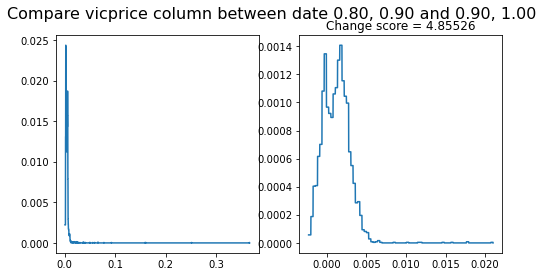

In [114]:
plot_diff(0.8,0.9,1.0,3)

<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


vicprice


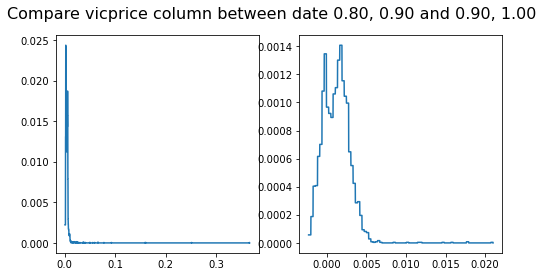

In [76]:
plot_diff(0.8,0.9,1.0,3)

<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


vicprice


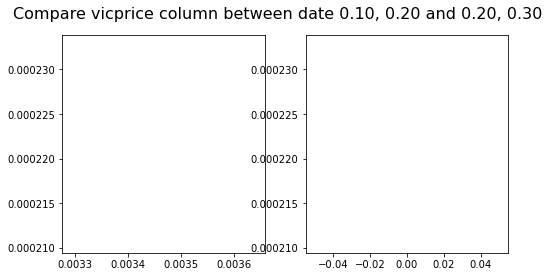

In [77]:
plot_diff(0.1,0.2,0.3,3)

In [78]:
score_list2 = setWindow(0.2);

0.0 0.2 0.4


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.2 0.4 0.6


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.4 0.6 0.8


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.6 0.8 1.0


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


In [79]:
score_list2

array([[-0.     ,  0.95334,  0.1593 ,  2.57023,  2.57023,  2.5871 ],
       [ 0.     ,  2.91618,  0.05896,  2.61421,  2.11153,  2.28349],
       [ 0.     ,  1.01443,  0.01984,  3.47624,  0.11781,  0.32033],
       [-0.     ,  1.13291,  0.09842,  0.92075,  0.24282,  0.1959 ]])

In [80]:
pd.DataFrame(score_list2, columns = x1.columns.tolist())

,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,-0.0,0.95334,0.15930,2.57023,2.57023,2.58710
1,0.0,2.91618,0.05896,2.61421,2.11153,2.28349
2,0.0,1.01443,0.01984,3.47624,0.11781,0.32033
3,-0.0,1.13291,0.09842,0.92075,0.24282,0.19590


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


nswprice


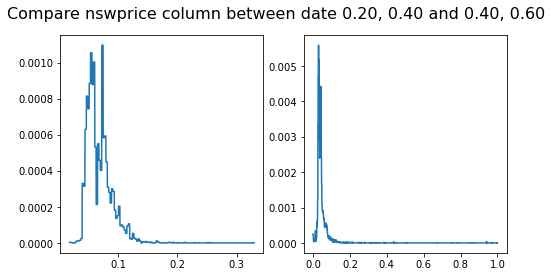

In [81]:
plot_diff(0.2,0.4,0.6,1)

In [82]:
score_list3 = setWindow(0.05)

0.0 0.05 0.1


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.05 0.1 0.15
0.1 0.15 0.2


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.15 0.2 0.25


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.2 0.25 0.3
0.25 0.3 0.35


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.3 0.35 0.4


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.35 0.4 0.45


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.4 0.45 0.5


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.45 0.5 0.55


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.5 0.55 0.6


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.55 0.6 0.65


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.6 0.65 0.7


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.65 0.7 0.75


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.7 0.75 0.8


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.75 0.8 0.85


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.8 0.85 0.9


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.85 0.9 0.95


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


0.9 0.95 1.0


<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


In [83]:
pd.DataFrame(score_list3, columns = x1.columns.tolist())

,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,0.36620,0.01518,0.00000,0.85277,0.84884
1,0.0,0.42476,0.24246,0.00000,0.89171,0.66371
2,0.0,5.76790,0.52583,0.00000,0.72220,0.67227
3,0.0,1.06139,0.05516,0.00000,1.01618,0.88348
4,-0.0,1.67891,0.09516,0.00000,1.85114,1.84379
5,0.0,1.01527,0.04384,0.00000,1.55532,1.71698
6,0.0,0.71475,0.14258,0.00000,1.91436,1.88990
7,0.0,0.38730,0.06919,0.45080,0.94507,2.68837
8,-0.0,0.99916,0.03755,0.38827,0.04643,0.54548
9,-0.0,2.04399,0.09589,1.25480,0.10377,0.16547


In [84]:
np.average(score_list, axis=1)

array([2.13584667, 1.06501   , 0.77017167, 1.04343833, 1.13922833,
       1.79672667, 0.49718   , 0.458205  , 0.939245  ])

In [85]:
df.columns

Index(['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand',
       'transfer', 'target', 'day_b'1'', 'day_b'2'', 'day_b'3'', 'day_b'4'',
       'day_b'5'', 'day_b'6'', 'day_b'7''],
      dtype='object')

In [86]:
drop_list = ['target','date',
             "day_b'1'","day_b'2'", "day_b'3'","day_b'4'","day_b'5'","day_b'6'","day_b'7'"]

In [87]:
# Helper func: extract info from original dataset by setting time windows
def detect_shift(lower_bond, mid_bond, upper_bond,return_array=False):
    date_array = df['date'].to_numpy()
    before = df[(df['date']>np.nanquantile(date_array, lower_bond)) & (df['date']<= np.nanquantile(date_array, mid_bond))]
    after = df[(df['date']>np.nanquantile(date_array, mid_bond)) & (df['date']<= np.nanquantile(date_array, upper_bond))]
    
    if len(before) != len(after):
        min_len = min(len(before), len(after))
        before = before[:min_len]
        after = after[:min_len]
    
    X_before = before.drop(columns = drop_list)
    X_after = after.drop(columns = drop_list)
    
    pca_99 = PCA(.999)
    components = pca_99.fit_transform(X_before)
    V = pca_99.components_
    
#     X_bef = X_before@V.T@V
    X_projection = X_after@V.T@V
#     print(X_before.shape)
    
    (nrow, ncol) = X_projection.shape
    col_list = X_before.columns.tolist()
    rv = []
    for index, col in enumerate(col_list):
        p = get_pdf(X_before.iloc[:,index].to_numpy())
        q = get_pdf(X_projection.iloc[:,index].to_numpy())
        score = get_change_score(p,q)
#         print(score)
        rv.append(score)
#         print(get_change_score(X_before.iloc[:,index].to_numpy(),X_projection.iloc[:,index].to_numpy()))
        
    if return_array:
        return X_before, X_projection
    
    return rv    
#     return X_before, X_projection
#     print(X_before[:,0].shape)
#     print(X_projection[:][0].shape)
    
    

In [88]:
len(df[(df['date']>np.nanquantile(date_array, 0.1)) & (df['date']<= np.nanquantile(date_array, 0.2))])

4512

In [89]:
detect_shift(0.5,0.6,0.7)

<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


[-0.0, 2.11672, 0.04765, 8.00544, 0.20525, 0.4053]

In [113]:
def plot_diff(low_bond, mid_bond, upper_bond, col_n):
    x1, x2 = detect_shift(low_bond, mid_bond, upper_bond, True)
    col_list = x1.columns.tolist()
    array1 = x1.iloc[:,col_n].to_numpy()
    array2 = x2.iloc[:,col_n].to_numpy()
    
    X_1 = np.linspace(np.min(array1), np.max(array1), len(array1))
    X_2 = np.linspace(np.min(array2), np.max(array2), len(array2))
    pdf_x1 = get_pdf(array1)
    pdf_x2 = get_pdf(array2)
    
    fig, axes = plt.subplots(1,2, figsize = (8,4))
    axes[0].plot(X_1, pdf_x1)
    axes[1].plot(X_2, pdf_x2)
    print(col_list[col_n])
    fig.suptitle("Compare %s column between date %1.2f, %1.2f and %1.2f, %1.2f"%(col_list[col_n], low_bond, mid_bond, mid_bond, upper_bond), fontsize=16)
    plt.title("Change score = 4.85526")

### Probability Distribution

In [91]:
# calculate the probability density function given an array
def get_pdf(array):
    hist_dist = scipy.stats.rv_histogram(np.histogram(array, bins='auto'))
    X1 = np.linspace(np.min(array), np.max(array), len(array))
    rvs = [hist_dist.pdf(x) for x in X1]
    normed_pdf = rvs/sum(rvs)
    
    return normed_pdf

In [92]:
array1 = x1.iloc[:,1].to_numpy()
array2 = x2.iloc[:,1].to_numpy()

In [93]:
import scipy.stats
histogram_dist_1 = scipy.stats.rv_histogram(np.histogram(array1, bins='auto'))
histogram_dist_2 = scipy.stats.rv_histogram(np.histogram(array2, bins='auto'))


In [94]:
X1 = np.linspace(np.min(array1), np.max(array1), 100)
X2 = np.linspace(np.min(array2), np.max(array2), 100)
rvs_1 = [histogram_dist_1.pdf(x) for x in X1]
rvs_2 = [histogram_dist_2.pdf(x) for x in X2]

In [95]:
# from sklearn import preprocessing
# rvs_1_normed = preprocessing.normalize(np.array(rvs_1).reshape(1,-1))
# rvs_1_normed.sum()
rvs_1 = rvs_1/sum(rvs_1)
rvs_2 = rvs_2/sum(rvs_2)
sum(rvs_1)


1.000000000000001

In [96]:
get_change_score(rvs_1, rvs_2)

<ipython-input-49-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-49-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


8.19338

In [97]:
rvs_2

array([0.00013137, 0.00013137, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00013137, 0.00013137, 0.        ,
       0.        , 0.        , 0.        , 0.00013137, 0.00013137,
       0.        , 0.        , 0.00262743, 0.05005255, 0.05005255,
       0.07028376, 0.07028376, 0.03284288, 0.02758802, 0.02758802,
       0.04506043, 0.0433526 , 0.0433526 , 0.02233316, 0.02233316,
       0.03849185, 0.03166054, 0.03166054, 0.05281135, 0.05281135,
       0.02141356, 0.03008408, 0.03008408, 0.02758802, 0.02942722,
       0.02942722, 0.01103521, 0.01103521, 0.00709406, 0.00945875,
       0.00945875, 0.01353127, 0.01353127, 0.00761955, 0.00197057,
       0.00197057, 0.00118234, 0.00840778, 0.00840778, 0.00039411,
       0.00039411, 0.        , 0.00052549, 0.00052549, 0.0027588 ,
       0.0027588 , 0.00013137, 0.00039411, 0.00039411, 0.00131372,
       0.00078823, 0.00078823, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [98]:
def kl_divergence_2(p, q):
    total = 0
    for i in range(len(p)):
        if q[i] != 0:
#             print(p[i])
#             print(q[i])
            score = p[i] * (np.log(p[i] / q[i]))
#             print(score)
        if not np.isnan(score):
            total += score
#             print(score)
    return np.round(total,5)
    
#     return sum(p[i] * np.log(p[i]/q[i]) for i in range(len(p)) if q[i]!= 0)

In [99]:
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
kl_divergence_2(rvs_1,rvs_2)

<ipython-input-98-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-98-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


8.19338

In [100]:
len(set(array1))

666

In [101]:
histogram_dist_1.pdf(0.116909)

1.8116922268257993

In [102]:
sum(rvs_1)

1.000000000000001

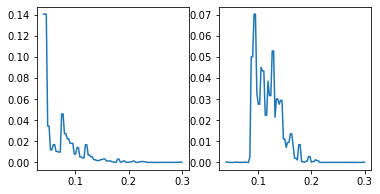

In [103]:
fig, axes = plt.subplots(1,2, figsize = (6,3))
axes[0].plot(X1,rvs_1)
axes[1].plot(X1, rvs_2)

In [104]:
# X_before and X_after
detect_shift(0.1,0.2,0.3)

<ipython-input-98-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-98-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


[-0.0, 1.45559, 0.29282, 0.0, 2.31721, 2.32444]

In [105]:
#X_before and X_projection
detect_shift(0.1,0.2,0.3)

<ipython-input-98-90dabc06524b>:7: RuntimeWarning: divide by zero encountered in log
  score = p[i] * (np.log(p[i] / q[i]))
<ipython-input-98-90dabc06524b>:7: RuntimeWarning: invalid value encountered in double_scalars
  score = p[i] * (np.log(p[i] / q[i]))


[-0.0, 1.45559, 0.29282, 0.0, 2.31721, 2.32444]

In [106]:
x1.iloc[:,0]

48      0.000000
49      0.021277
50      0.042553
51      0.063830
52      0.085106
          ...   
4555    0.914894
4556    0.936170
4557    0.957447
4558    0.978723
4559    1.000000
Name: period, Length: 4512, dtype: float64

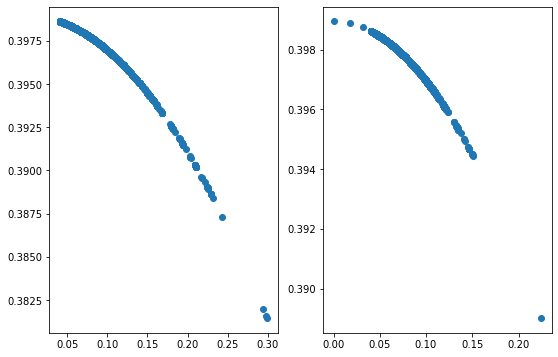

In [107]:
# PDF on X_before and X_after (without projection on PCA)
fig, axes = plt.subplots(1,2, figsize = (9,6))
axes[0].scatter(x1.iloc[:,1], norm.pdf(x1.iloc[:,1]))
axes[1].scatter(x2.iloc[:,1], norm.pdf(x2.iloc[:,1]))

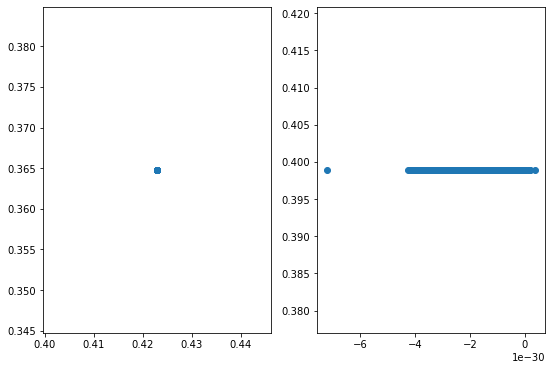

In [108]:
# PDF on X_before and the projection of X_after on PCs of X_before
fig, axes = plt.subplots(1,2, figsize = (9,6))
axes[0].scatter(x1.iloc[:,4], norm.pdf(x1.iloc[:,4]))
axes[1].scatter(x2.iloc[:,4], norm.pdf(x2.iloc[:,4]))

In [109]:
int(2.29553203e+05)

229553

In [110]:
x1

,period,nswprice,nswdemand,vicprice,vicdemand,transfer
48,0.000000,0.059235,0.442874,0.003467,0.422915,0.414912
49,0.021277,0.056443,0.410890,0.003467,0.422915,0.414912
50,0.042553,0.051489,0.378905,0.003467,0.422915,0.414912
51,0.063830,0.044374,0.316721,0.003467,0.422915,0.414912
52,0.085106,0.041041,0.257959,0.003467,0.422915,0.414912
...,...,...,...,...,...,...
4555,0.914894,0.088567,0.548051,0.003467,0.422915,0.414912
4556,0.936170,0.116909,0.584499,0.003467,0.422915,0.414912
4557,0.957447,0.097574,0.593573,0.003467,0.422915,0.414912
4558,0.978723,0.116909,0.602202,0.003467,0.422915,0.414912
